<center><img src="redpopcorn.jpg"></center>

# Description of Project:

This was a project that I had to complete in one of my courses with Datacamp.  It uses the netflix_data.csv data file that was supplied by the course.  The main questions for this project were the following:

<p style="color: blue">1. What was the most frequent length of movies of the 90's between the year 1990 - 1999.</p>
<p style="color: blue">2. There were a few "Action" films during this decade.  How many of these action films were below 90 minutes in length.</p>

## The data
### **netflix_data.csv**

Here is the breakdown of the columns (i.e. variables) that incompassed the date set:


| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

#  1. Data Exploration

### Note: Data Discovery and data cleaning were not neccessary for this project, since the dataset was already cleaned prior to analyzing.

Import Pandas and Matplotlib and read in dataset (netflix_data.csv)

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

## 1.1 Getting some visual and statistics on the data set.

In [17]:
# Get a feel for the data and what it contains
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


In [19]:
# First take a look to see if there are any NULLS
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


## 2. Data Manipulation to help answer Original Questions

### 2.1 Creating a new dataframe to hold the correct columns

Using the column/variable "release_year" to get data from the years 1990 - 1999.

In [8]:
# Create a new df that is a sub-set of the original only with data from 1990 - 1999
new_net_df = netflix_df[(netflix_df.release_year >= 1990) & (netflix_df.release_year <= 1999)]
new_net_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


### 2.2 Drawing a Histogram on the Distribution of Film Length.

This gives a good view of the distribution of film length over a ten year period.  However, we don't really get a perfect
idea on what is exactly the frequency. So, to get the frequency or mode of which film length was the most dominant.  I decided to use the Pandas mode() method on the extracted data set.

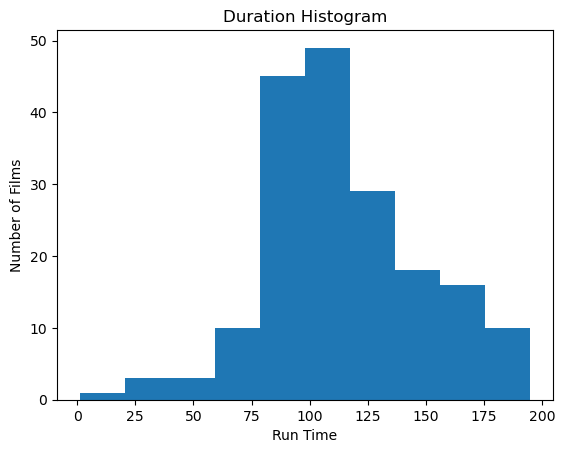

In [16]:
# Create a histogram to get an idea of the most common movie duration in the 90's.  
# However, It seems that the mode or median could be between 90 - 100 but hard to tell with just this graph.

plt.hist(new_net_df['duration'])
plt.xlabel("Run Time")
plt.ylabel("Number of Films")
plt.title ("Duration Histogram")
plt.show()

In [6]:
# Used the mode() function to see which duration time was more frequent in the data.
duration = new_net_df['duration'].mode()[0]
duration

94

## 3. Getting a Count for Action Movies Under 90 Minutes

This final for loop counts how many "Action" movies in the 90's where under 90 minutes in length.  

In [15]:
# Get the final count of movies that were under the 90 miniute duration time.
short_movie_count = 0
for index, rows in new_net_df.iterrows():
    if rows.genre == 'Action' and rows.duration < 90:
        short_movie_count += 1
        
short_movie_count

7

## 4. Final Answers

<b>1st Question:</b> What was the most dominant length for films in the 90's?

<p style="color: blue"><b>Answer:</b> The most frequent length of films within this decade was 94 minutes.</p>

<b>2nd Question:</b> Among the genre of "Action" films, how many of those films length was under 90 minutes?

<p style="color:blue"><b>Answer:</b> There were a total of seven (7) films that were under 90 minutes during the 90's.</p>  
